In [22]:
#1.FIFA World Cup

#The FIFA World Cup, often simply called the World Cup, is an international association football competition contested 
#by the senior men's national teams of the members of the Fédération Internationale de Football Association (FIFA), 
#the sport's global governing body. The championship has been awarded every four years since the inaugural tournament in 1930, 
#except in 1942 and 1946 when it was not held because of the Second World War. The current champion is France, 
#which won its second title at the 2018 tournament in Russia.

#The 21 World Cup tournaments have been won by eight national teams. Brazil have won five times, and they 
#are the only team to have played in every tournament. The other World Cup winners are Germany and Italy, 
#with four titles each; Argentina, France, and inaugural winner Uruguay, with two titles each; and England and Spain, 
#with one title each.

#2.Important Libaries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
#3.Read Datasheet

df=pd.read_csv(r"C:\Users\ABHIJIT FLOYD\Dropbox\PC\Downloads\fifa_eda.csv.zip")
print(df.shape)

#So the dataset has 18 attributes and 18207 rows

(18207, 18)


In [5]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [6]:
#3. Time for cleaning the dataset

#Dataset cleaning is an important set of any EdA as it will help in understanding the patterns well. 
#We will start by seeing whether the datset has any null values or not.

df.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [7]:
#So we see that the attributes such as 'Club','Contract Valid Until','International Reputation','Skill Moves','Value' 
#contains null values. We will remove the tuples which contain 
#such null values

df=df.dropna(subset=['Club','Contract Valid Until','International Reputation','Skill Moves','Value'])

In [8]:
#Let us check that whether we were able to succesfull remove all the tuples which contained null values

df.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Skill Moves                 0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
dtype: int64

In [9]:
#So now we can rest assured that all the dataset has been completely cleaned off of null values

#So now since the dataset cleaning step is complete we can focus more on exploring the dataset itself

#4.Checking the number of unique instance of an attribute

for f in df.columns:
    print(f,df[f].nunique())

ID 17907
Name 16913
Age 28
Nationality 163
Overall 48
Potential 47
Club 651
Value 216
Wage 143
Preferred Foot 2
International Reputation 5
Skill Moves 5
Position 27
Joined 22
Contract Valid Until 35
Height 21
Weight 57
Release Clause 1245


25.0


<AxesSubplot:xlabel='Age', ylabel='Count'>

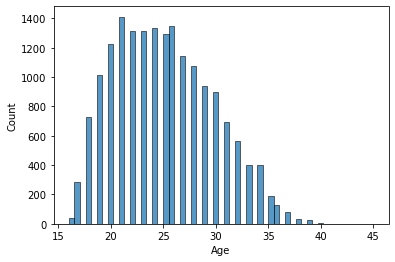

In [10]:
#5.Age
#et us take a closer look at the age of the players. More accurately we will focusing on the distribution of the age data

print(df['Age'].median())
sns.histplot(x='Age',data=df)

#The median age is 25 i.e most of the players have age closer to 25.

<AxesSubplot:xlabel='Preferred Foot', ylabel='count'>

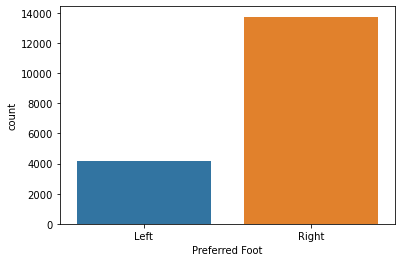

In [11]:
#6.Preferred Foot
#Let us see whether majority of players prefer left foot or right foot

sns.countplot(x='Preferred Foot',data=df)

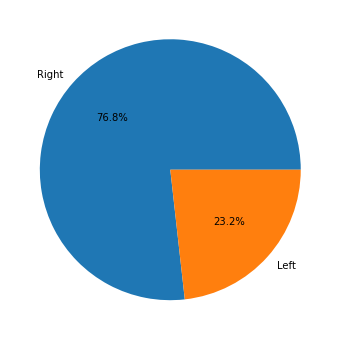

In [12]:
#It seems most players like prefer to take the shot with their right foot.But still unclear on how many players though

plt.subplots(figsize=(6,6))
plt.pie(df["Preferred Foot"].value_counts(), labels=["Right","Left"],autopct="%1.1f%%")
plt.show()

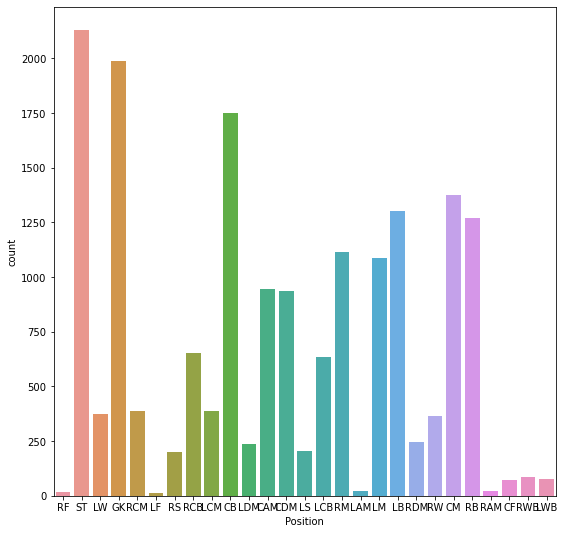

In [13]:
#Well now we know. 76.8% of the players prefer right foot

#7.Position they play in

#Let's find out which position most players play in

plt.subplots(figsize=(9,9))
sns.countplot(x='Position',data=df)
plt.show()

<AxesSubplot:xlabel='International Reputation', ylabel='count'>

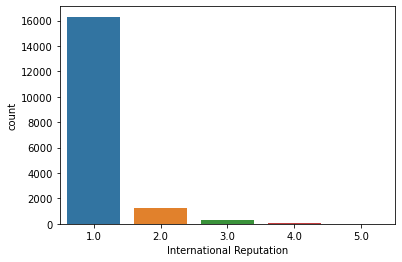

In [14]:
#It seems as though most players play in the ST position

#8.International Reputation
#Internation Reputation is a huge factor when it comes to a player and the team he is in. 
#Let us take a closer look as to how strong are their reputation on a scale of 1-5

sns.countplot(x='International Reputation',data=df)

#This gives us any early idea as to how many playes have the highest international reputation

<AxesSubplot:xlabel='Skill Moves', ylabel='count'>

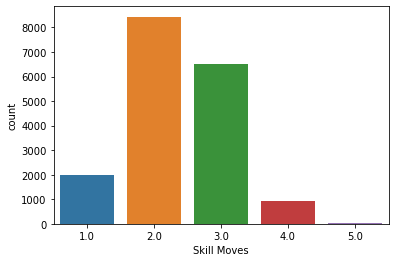

In [15]:
#9.Skill Moves
#Skill Moves of a player directly translates into their performace in a game.


sns.countplot(x='Skill Moves',data=df)

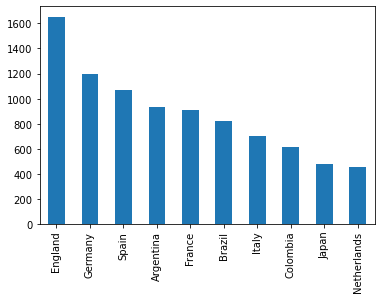

In [16]:
#Most of the players are of skill set point 2

#10.Nationality
#Let's find the top 10 countries with the most players in FIFA.

national = df['Nationality'].value_counts()[:10]
national.plot.bar()
plt.show()


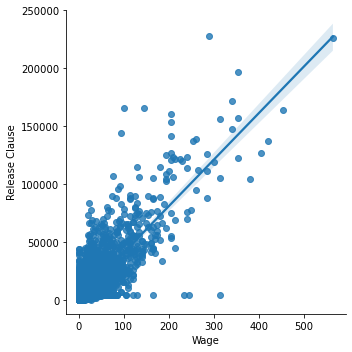

In [17]:
#11.Value,Wage,Release Clause
#From here on now, we will focus on the relation between these three attributes.

sns.lmplot(x='Wage',y='Release Clause',data=df)

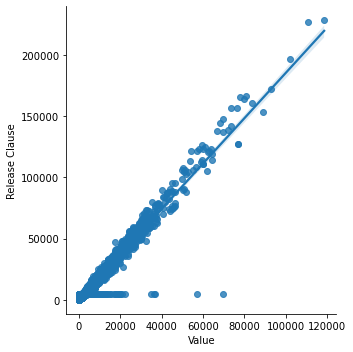

In [18]:
sns.lmplot(x='Value',y='Release Clause',data=df)

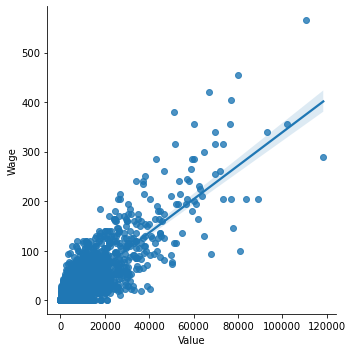

In [19]:
sns.lmplot(x='Value',y='Wage',data=df)

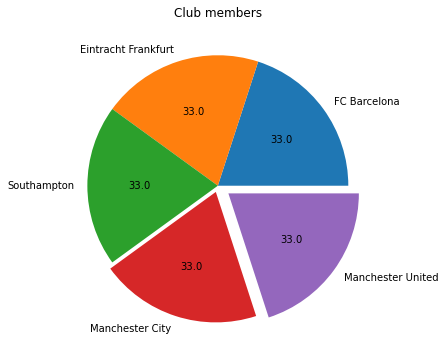

In [20]:
#12.Clubs
#Lastly, we will take a look at the top 5 clubs with most players.

plt.subplots(figsize=(6,6))
size = df["Club"].value_counts().sort_values(ascending = False).head(5)
def value(val):
               x = np.round(val/100.*size.sum())
               return x
plt.pie(size, labels = size.index, autopct = value, explode=[0,0,0,0.05,0.1])
plt.title("Club members")
plt.show()

In [ ]:
#Thank you. I am new to the whole of Data Science. So do comment your suggestion or improvements 